#  Credit Card Fraud Detection

![fraude](fraude.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome" data-toc-modified-id="Welcome-0">Welcome</a></span></li><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-1">Dataset description</a></span></li><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-2">Important libraries</a></span></li><li><span><a href="#Loading-our-data" data-toc-modified-id="Loading-our-data-3">Loading our data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-4">Correlation analysis</a></span></li><li><span><a href="#Fraud/-non-Fraud-ratio" data-toc-modified-id="Fraud/-non-Fraud-ratio-5">Fraud/ non-Fraud ratio</a></span><ul class="toc-item"><li><span><a href="#Class-imbalance-visual-representation" data-toc-modified-id="Class-imbalance-visual-representation-5.1">Class imbalance visual representation</a></span></li></ul></li><li><span><a href="#Traditional-way-of-cathing-fraud:-Rules" data-toc-modified-id="Traditional-way-of-cathing-fraud:-Rules-6">Traditional way of cathing fraud: Rules</a></span></li><li><span><a href="#Machine-Learning-models" data-toc-modified-id="Machine-Learning-models-7">Machine Learning models</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-sets" data-toc-modified-id="Train-/-Test-sets-7.1">Train / Test sets</a></span></li><li><span><a href="#Hyperparameter-tunning-with-GridSearchCV" data-toc-modified-id="Hyperparameter-tunning-with-GridSearchCV-7.2">Hyperparameter tunning with GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.2.1">Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.2.2">Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2.3">Random Forest</a></span></li><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-7.2.4">Adaboost</a></span></li><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-7.2.5">Light Gradient Boosting</a></span></li></ul></li></ul></li><li><span><a href="#Hybrid-Rule_Based-Machine-Learning-Model" data-toc-modified-id="Hybrid-Rule_Based-Machine-Learning-Model-8">Hybrid Rule_Based Machine Learning Model</a></span></li><li><span><a href="#Synthetic-Minority-Oversampling-Technique-(SMOTE)" data-toc-modified-id="Synthetic-Minority-Oversampling-Technique-(SMOTE)-9">Synthetic Minority Oversampling Technique (SMOTE)</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tunning-with-GridSearchCV" data-toc-modified-id="Hyperparameter-tunning-with-GridSearchCV-9.1">Hyperparameter tunning with GridSearchCV</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9.2">Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-9.3">Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-9.4">Random Forest</a></span></li><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-9.5">Adaboost</a></span></li><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-9.6">Light Gradient Boosting</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-9.7">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9.8">References</a></span></li></ul></li></ul></div>

## Welcome

"Billions of dollars are lost to online payment fraud annually, often without much recourse for victim companies. This makes it critically important to identify suspicious and fraudulent behavior in advance, prior to bad actors committing the crime. Those outside this niche industry may assume that fraudulent orders or accounts present themselves in red blinking lights, or some other obvious form. The truth is that bad actors have the sole intention of having their online activity blend in with that of legitimate users. It is our job as fraud fighters to home in on the anomalies of their information, devices, and human behavior to identify risk indicators"...()



Hi, welcome to this noteboock!

I find that Fraud prevention analytics is an amazing field for data analysis, and I hope that at the end of this notebook you think the same and want to learn a bit more about it. 


The aims of this project are the following:

-To understand the concept of "Fraud". <br>
-To explain how fraud prevention analysts caught fraudulent transactions before Machine Learning(ML). <br>
-To develop a ML model to estimate if a transaction is fraudulent or not. <br>

Sounds interesting, isn't it?

Let's start




## Dataset description

For this project we will use the dataset ([Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)) from Kaggle.

In the dataset we will find a total of 284.807 transactions made by credit card in two different days in September 2013,  where only 492 of them are marked as fraud. Fraudulent transactions represent only the 0.172% of the dataset that show us that the dataset is highly unbalanced. 

All the variables from the dataset are numeric and features from "V1" to "V28" are the result of PCA transformation (Due to privacy reasons we cannot have the information about the original variables). Only two feautures were not transformed with PCA: "Time" and "Amount". The feature "Class" is our target variable and it has two possible values:
    
    1= fraud
    0= non-fraud  

## Important libraries

In [1]:
#pandas and numpy
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#hyperparameters tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.base import BaseEstimator

#model performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

#others
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from typing import Dict, Tuple


## Loading our data


In [2]:
df=pd.read_csv("Data/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Understanding our data:
df.describe()

In [ ]:
#data type:
df.info()

In [ ]:
#Do we have any missing value?
df.isna().sum()

In [3]:
#According to the dataset description, the features from "V1" to "V28" are the result of PCA(Principal Components Analysis). 
#We know that features must be scaled before using this technique. 
#However the features "Time" and "Amount" are not scaled we should scaled them before continuing with our analysis. 

df['Amount_scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_scaled'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

#Now we have to drop from our dataset the features "Time" and "Amount":
df=df.drop(columns=['Amount', 'Time'],axis=1)


In [4]:
#I changed the features order in the dataset. I like having my target variable at the end of the dataset. 
list(df.columns) 
df = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount_scaled','Time_scaled','Class']]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


## Correlation analysis

In [ ]:
#Correlation between the features and the dependent variable "Class":
df[df.columns[0:]].corr()['Class'][:].sort_values(ascending=False)

In [ ]:
#Triangle Correlation Heatmap:

plt.figure(figsize=(30, 25))
corr=df.corr()
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dataframe Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


## Fraud/ non-Fraud ratio

In [ ]:
# Let's calculate the ration of fraudulent and no fraudulent transactions:
y=df['Class'].value_counts()
y

In [ ]:
#ratio:
y/len(df)

As we already mentioned in the dataset description section. The dataset is highly imbalanced with only 0.1727% of fraudulent transactions. 

### Class imbalance visual representation

Text(0.5, 1.0, 'Class Distributions \n (0:Non_Fraud || 1: Fraud)')

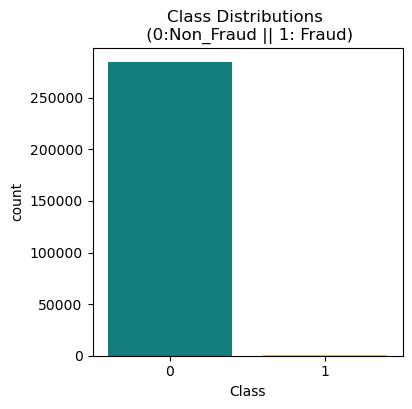

In [5]:
#Visualizations can be a very powerful tool to detect class imbalance. 
#We can use different kind of charts to this purpose:

# 1: Bar chart:
cls = ["#008F8D", "#F9BF51"]
sns.set_palette(sns.color_palette(cls))

fig,ax=plt.subplots(figsize=(4,4))

sns.countplot( data=df,x='Class')
plt.title('Class Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=12)

In [ ]:
colors = ["#008F8D", "#FE7E37","FFEFD8","#F9BF51"]

In [6]:
# 2: Scartter plot:

#First step: convert our dataframe in 2 variables:

X=df.iloc[:,0:30].values
y=df.Class.values


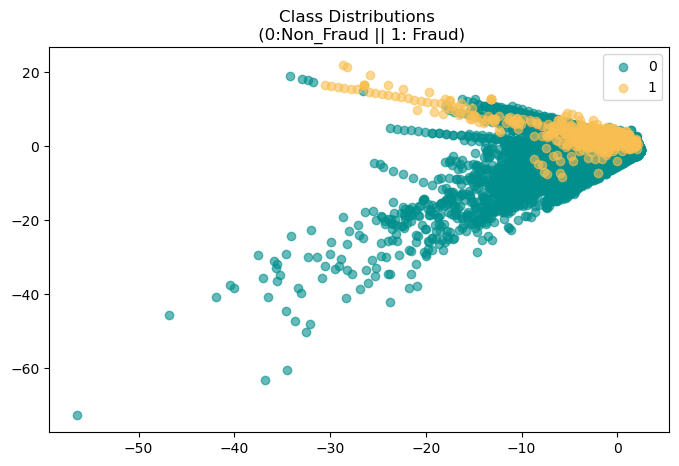

In [7]:
plt.figure(figsize=(8,5))
counter = Counter(y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title('Class Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=12)
plt.show()

## Traditional way of cathing fraud: Rules 

Rules are the traditional way of catching fraudulent transactions. 

How do rules work? The idea is very simple; we just need to create a rule that send to manual review any transaction above a certain amount.
We can set as many rules as we need, but keep in mind that some of them would result in a big number of false positives

Can we set rules in our dataset? Sure!


First we will define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on our features to detect fraud.



In [ ]:
mean=df.groupby('Class').mean()

In [ ]:
pd.set_option('display.max_columns', None)
mean

In [ ]:
# We will send to manual review all transactions from V1 that are  smaller than -3 and all transactions from V7 smaller than -5.

df['predicted_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V7'] < -5), 1, 0)

In [ ]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases

print(pd.crosstab(df.Class, df.predicted_fraud, rownames=['Fraud'], colnames=['Predicted_Fraud']))

We got our first results!

using rules, we have detected 157 of 492 fraudulent cases (31.91%), and we got 824 false positives. Can Machine Learaning improve this result?

In [ ]:
#I do not need the feature "flag as fraud" anymore, so I will delete it
df=df.drop(columns=['predicted_fraud'])

## Machine Learning models

In this section we will train and compare the results of 5 different ML models: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Adaboost Classifier and Light Gradient Boosting Classifier in order to find out which one is the more effective in detecting fraudulent transactions. 

Taking into account that our dataset is high unbalanced there are 3 different approaches that we could apply:

**Approach 1**: Ignore the imbalanced problem: In this case we cannot use "accuracy" to comparte the model performance but we can use other metrics instead such as "roc_auc","confussion matrix", "precision", "recall" or "f1". 

**Approach 2**: Oversampling the minotiry class using SMOTE until both clases are equally represented.

**Approach 3**: Undersampling the mayority class until both classes are equally represented

In this notebook we will follow the first approach. Since we want our models finds the maximun number of fraud cases, we will choose the model with the highest recall score value. 



### Train / Test sets

In [ ]:
# XY split:

X=df.drop('Class', axis=1)
y=df.Class


In [ ]:
#Create training and test set:

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000)

In [ ]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Adaboost Classifier" :AdaBoostClassifier(),
   "Light Gradient Boosting" :LGBMClassifier()
    
      
}


# Cross validation score for different classifiers using "recall" as scoring:

for key, model in models.items():
    model.fit(X_train,y_train)
    score = cross_val_score(model, X, y, scoring='recall',cv=5)
    print(f'{key} model recall score:{round(score.mean(), 2)}')

Random Forest Classifier is the algorithm with the highest recall value:0.78.

In [ ]:
#Let's see how many fraud cases we can detect with random forest:

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)


In [ ]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred))

In [ ]:
print("Random Forest Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

We can see that **Random Forest** model detects the 75.65% of fraduluent transactions (115 of 152 cases) and we have only 5 falses positives. 

In Fraud analysis we have to find the balance between catching the maximum number of fraudulent transactions( this means to optimize the recall score) and keeping the number of false positives as low as possible. 

In this scenario a high number of falses positives would represents extra workload for Fraud Deparment because they have to review manually thousands of card transactions, and for Customer Service Department,since they have to deal with the customer's complaints whose transactions have been tagged as fraudulent by mistake.That is why it is important to keep the number of false positives as low as possible.  


Let's see if we can improve these results by tunning the hyperparameters of our model 


### Hyperparameter tunning with GridSearchCV




#### Logistic Regression

In [ ]:

logreg_hyperparameters = {"penalty": ['l2', 'l1'], 
                          'C': [0.01,1,10,100],
                         "solver":['liblinear','saga']}


search=GridSearchCV(LogisticRegression(), logreg_hyperparameters, scoring='recall',n_jobs=-1,cv=5)
result_logreg=search.fit(X_train, y_train)


In [ ]:
print('Best Recall Score of Logistic Regression model: %s' % result_logreg.best_score_)
print('Best Hyperparameters of Logistic regression Model: %s' % result_logreg.best_params_)


#### Decision Tree

In [ ]:
hyperparameters = {"criterion": ["gini", "entropy"],
                   "max_depth":list(range(2,4,1)), 
                   "min_samples_leaf": list(range(5,7,1))}

search = GridSearchCV(DecisionTreeClassifier(), hyperparameters,scoring='recall', n_jobs=-1, cv=5)
result_dtc=search.fit(X_train, y_train)


In [ ]:
print('Best Recall Score of Decision Tree model: %s' % result_dtc.best_score_)
print('Best Hyperparameters of Decision Tree model: %s' % result_dtc.best_params_)


#### Random Forest

In [ ]:
rfc_hyperparameters = {'n_estimators': [1,30,60,100],
              'max_features': ['sqrt', 'log2'], 
              'max_depth': [2,4,8,10],
              'criterion': ['gini', 'entropy','log_loss']}


search = GridSearchCV(RandomForestClassifier(), rfc_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_rfc=search.fit(X_train, y_train)


In [ ]:
print('Best Recall Score of Random Forest model: %s' % result_rfc.best_score_)
print('Best Hyperparameters of Random Forest model: %s' % result_rfc.best_params_)

#### Adaboost

In [ ]:
ada_hyperparameters = {'n_estimators': [1,30,60,100], 
                       'learning_rate': [0.01,0.1,0.2,0.5]}


search = GridSearchCV(AdaBoostClassifier(), ada_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_ada=search.fit(X_train, y_train)

In [ ]:
print('Best Recall Score of Adaboost model: %s' % result_ada.best_score_)
print('Best Hyperparameters of Adaboost model: %s' % result_ada.best_params_)

#### Light Gradient Boosting

In [ ]:
lgb_hyperparameters = {"n_estimators":[1,30,60,100],
                      "max_depth":[2,4,6,8],
                      "learning_rate":[0.01,0.1,0.2,0.5],
                      "min_samples_leaf":[10,20,30],
                     "subsample" : [0.1,0.2,0.5,0.9]}

search = GridSearchCV(LGBMClassifier(), lgb_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_lgb=search.fit(X_train, y_train)


In [ ]:
print('Best Recall Score of Light Gradient Boosting model: %s' % result_lgb.best_score_)
print('Best Hyperparameters of Light Gradient Boosting model: %s' % result_lgb.best_params_)

Light Gradient Boosting is the model with the highest recall score. Let's apply the parameters values to our Light Gradient Boosting model.

In [ ]:
lgbc = LGBMClassifier(learning_rate= 0.5,max_depth= 6,
                     min_samples_leaf= 20,n_estimators= 1, 
                      subsample= 0.1)

result_lgbc=lgbc.fit(X_train, y_train)

y_pred_lgbc=result_lgbc.predict(X_test)
y_pred_probs_lgbc = result_lgbc.predict_proba(X_test)[:,1]

In [ ]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred_lgbc))

In [ ]:
print("Gradient Boosting Confusion matrix for the test set after hyperparameter tunning")
print(confusion_matrix(y_test,y_pred_lgbc))
conf_mat = confusion_matrix(y_test,y_pred_lgbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

In [ ]:
cls

In [ ]:
print("roc_auc_score of Gradient Boosting classifier: ",roc_auc_score(y_test,y_pred_probs_lgbc ))

In [ ]:

#gradient boosting
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_lgbc )
auc = round(roc_auc_score(y_test, y_pred_probs_lgbc), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))


In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=lgbc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#008F8D')
plt.title('LGB Features Importances')
plt.show() 



  

After the hyperparameter tunning **Light Gradient Boosting** is our best model with a recall score of 0.82. 



## Hybrid Rule_Based Machine Learning Model

In [ ]:
# XY split:

x=df.drop('Class', axis=1)
y=df.Class

In [ ]:
train_x, test_x, train_y,test_y=train_test_split(x,y,test_size=0.30, random_state=1000)

In [ ]:

class RuleAugmentedEstimator(BaseEstimator):
    """Augments sklearn estimators with rule-based logic.
    This class is a wrapper class for sklearn estimators with the additional
    possibility of adding rule-based logic to the underlying estimator.
    The provided rules are hard-coded and take precedence over the underlying
    estimator's predictions.
    """

    def __init__(self, base_model: BaseEstimator, rules: Dict, **base_params):
        """Initializes the RuleAugmentedEstimator instance.
        Initializes the rule-augmented estimator by supplying the underlying
        sklearn estimator as well as the hard-coded rules.
        Args:
            base_model: The underlying sklearn estimator.
              Must implement a fit and predict method.
            rules: The hard-coded rules in the format of a dictionary,
              with keys being the pandas dataframe column name, and the values
              being a tuple in the following form:
              
              (comparison operator, value, return value)
              Acceptable comparison operators are:
              "=", "<", ">", "<=", ">="
              Example:
              
              {"House Type": [
                  ("=", "Penthouse", 1.0),
                  ("=", "Shack", 0.0)
               ],
               "House Price": [
                   ("<", 1000.0, 0.0),
                   (">=", 500000.0, 1.0)
              ]}
            **base_params: Optional keyword arguments which will be passed on
            to the ``base_model``.
        Examples:
            The below example illustrates how an instance of the 
            RuleAugmentedEstimator class can be initialized with a trained 
            sklearn GradientBoostingRegressor instance.
            >>> gbr = GradientBoostingRegressor()
            >>> rules = {"House Type": [
                            ("=", "Penthouse", 1.0),
                            ("=", "Shack", 0.0)
                         ],
                         "House Price": [
                            ("<", 1000.0, 0.0),
                            (">=", 500000.0, 1.0)
                        ]}
            >>> ra_estimator = RuleAugmentedEstimator(gbr, rules)
        """

        self.rules = rules
        self.base_model = base_model
        self.base_model.set_params(**base_params)

    def __repr__(self):
        return "Rule Augmented Estimator:\n\n\t Base Model: {}\n\t Rules: {}".format(self.base_model, self.rules)

    def __str__(self):
         return self.__str__
   
    def _get_base_model_data(self, X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
        """Filters the trainig data for data points not affected by the rules."""
        
        X_train = X

        for category, rules in self.rules.items():

            if category not in X_train.columns.values: continue

            for rule in rules:

                if rule[0] == "=":
                    X_train = X_train.loc[X_train[category] != rule[1]]

                elif rule[0] == "<":
                    X_train = X_train.loc[X_train[category] >= rule[1]]

                elif rule[0] == ">":
                    X_train = X_train.loc[X_train[category] <= rule[1]]

                elif rule[0] == "<=":
                    X_train = X_train.loc[X_train[category] > rule[1]]

                elif rule[0] == ">=":
                    X_train = X_train.loc[X_train[category] < rule[1]]

                else:
                    print("Invalid rule detected: {}".format(rule))
                
        indices = X_train.index.values
        y_train = y.iloc[indices]
        
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        
        return X_train, train_y  

    def fit(self, X: pd.DataFrame, y: pd.Series, **kwargs):
        """Fits the estimator to the data.
        
        Fits the estimator to the data, only training the underlying estimator
        on data which isn't affected by the hard-coded rules.
        
        Args:
            X: The training feature data.
            y: The training label data.
            **kwargs: Optional keyword arguments passed to the underlying
            estimator's fit function.
            
    """
        X_train, y_train = self._get_base_model_data(X, y)
        self.base_model.fit(X_train, y_train, **kwargs)
    
    def predict(self, X: pd.DataFrame) -> np.array:
        """Gets predictions for the provided feature data.
        
        The predicitons are evaluated using the provided rules wherever possible
        otherwise the underlying estimator is used.
        
        Args:
            X: The feature data to evaluate predictions for.
        
        Returns:
            np.array: Evaluated predictions.
        """
        
        p_X = X.copy()
        p_X['prediction'] = np.nan

        for category, rules in self.rules.items():

            if category not in p_X.columns.values: continue

            for rule in rules:

                if rule[0] == "=":
                    p_X.loc[p_X[category] == rule[1], 'prediction'] = rule[2]

                elif rule[0] == "<":
                    p_X.loc[p_X[category] < rule[1], 'prediction'] = rule[2]

                elif rule[0] == ">":
                    p_X.loc[p_X[category] > rule[1], 'prediction'] = rule[2]

                elif rule[0] == "<=":
                    p_X.loc[p_X[category] <= rule[1], 'prediction'] = rule[2]

                elif rule[0] == ">=":
                    p_X.loc[p_X[category] >= rule[1], 'prediction'] = rule[2]

                else:
                    print("Invalid rule detected: {}".format(rule))

        if len(p_X.loc[p_X['prediction'].isna()].index != 0):

            base_X = p_X.loc[p_X['prediction'].isna()].copy()
            base_X.drop('prediction', axis=1, inplace=True)
            p_X.loc[p_X['prediction'].isna(), 'prediction'] = self.base_model.predict(base_X)

        return p_X['prediction'].values
    
    def get_params(self, deep: bool = True) -> Dict:
        """Return the model's and base model's parameters.
        Args:
            deep: Whether to recursively return the base model's parameters.
        Returns
            Dict: The model's parameters.
        """
        
        params = {'base_model': self.base_model,
                  'outcome_range': self.outcome_range,
                  'rules': self.rules
                 }
    
        params.update(self.base_model.get_params(deep=deep))
        return params
    
    def set_params(self, **params):
        """Sets parameters for the model and base model.
        Args:
            **params: Optional keyword arguments.
        """
                  
        parameters = params
        param_keys = parameters.keys()
        
        if 'base_model' in param_keys:
            value = parameters.pop('base_model')
            self.base_model = value
            
        if 'rules' in param_keys:
            value = parameters.pop('rules')
            self.rules = value
        
        self.base_model.set_params(**parameters)

In [ ]:

rules = {       
        
          
        "V17": [
            ("<", -2.5, 1.0),
            (">=", -2.5, 0.0)]}
         
ra_estimator = RuleAugmentedEstimator(lgbc, rules)

# Now, the RuleAugmentedEstimator can be used similarily to the underlying base estimator, assuming data X is defined

predictions = ra_estimator.predict(X_test)



In [ ]:
print("Classification report for the test set")
print(classification_report(y_test,predictions))

In [ ]:
print("Gradient Boosting Confusion matrix for the test set before hyperparameter tunning")
print(confusion_matrix(y_test, predictions))
conf_mat = confusion_matrix(y_test,predictions)
sns.heatmap(conf_mat, square=True, annot=True, color=cls, fmt='d', cbar=False)

plt.show()

## Synthetic Minority Oversampling Technique (SMOTE)

In [8]:
X=df.iloc[:,0:30].values
y=df.Class.values

In [9]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 30)
y shape: (284807,)


In [10]:

# Define the resampling method
method = SMOTE(random_state=1000)


In [11]:
# Create the resampled feature set
X_sm, y_sm = method.fit_resample(X, y)


In [12]:
pd.value_counts(pd.Series(y_sm))

0    284315
1    284315
dtype: int64

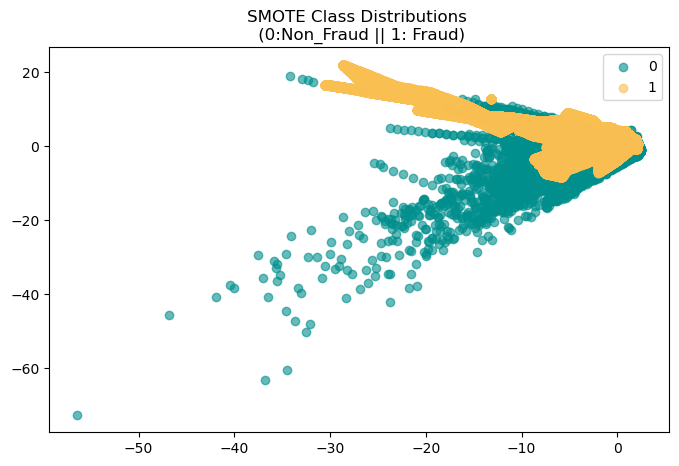

In [13]:
plt.figure(figsize=(8,5))
counter = Counter(y_sm)

for label, _ in counter.items():
    row_ix = np.where(y_sm == label)[0]
    plt.scatter(X_sm[row_ix, 0], X_sm[row_ix, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title('SMOTE Class Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=12)
plt.show()

In [14]:
X_columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount_scaled','Time_scaled']
y_columns= df = ['Class']


df_sm = pd.concat([pd.DataFrame(X_sm, columns=X_columns), pd.DataFrame(y_sm, columns=y_columns)], axis=1)

# confirm there is the same number of fraudulent and no-fraudulent transactions.
y_sm=df_sm['y'].value_counts()
y_sm

<AxesSubplot:title={'center':'SMOTE Class Distributions \n (0:Non_Fraud || 1: Fraud)'}>

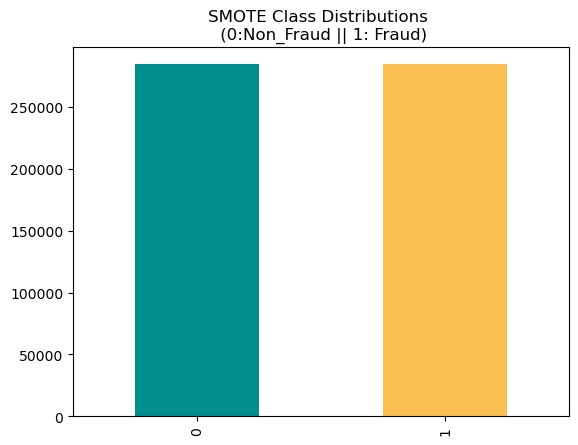

In [15]:

df_sm.Class.value_counts().plot(kind='bar', title='SMOTE Class Distributions \n (0:Non_Fraud || 1: Fraud)',color=cls)




X_sm=df_sm.drop('Class', axis=1)
y_sm=df_sm.Class

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.30, random_state=1000)

In [19]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Adaboost Classifier" :AdaBoostClassifier(),
   "Light Gradient Boosting" :LGBMClassifier()
    
      
}


# Cross validation score for different classifiers using "recall" as scoring:

for key, model in models.items():
    model.fit(X_train,y_train)
    score = cross_val_score(model, X_sm, y_sm, scoring='accuracy',cv=5)
    print(f'{key} model accuracy score:{round(score.mean(), 2)}')

Logisitic Regression model accuracy score:0.94
Decision Tree model accuracy score:0.78
Random Forest Classifier model accuracy score:0.83
Adaboost Classifier model accuracy score:0.78
Light Gradient Boosting model accuracy score:0.83


In [20]:
#Let's see how many fraud cases we can detect with Logistic Regression model:

logreg_sm=LogisticRegression()
logreg_sm.fit(X_train,y_train)
y_pred_logreg_sm=logreg_sm.predict(X_test)

In [21]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred_logreg_sm))

Classification report for the test set
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85020
           1       0.97      0.92      0.95     85569

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



Logistic Regression Confusion matrix for the test set
[[82889  2131]
 [ 6974 78595]]


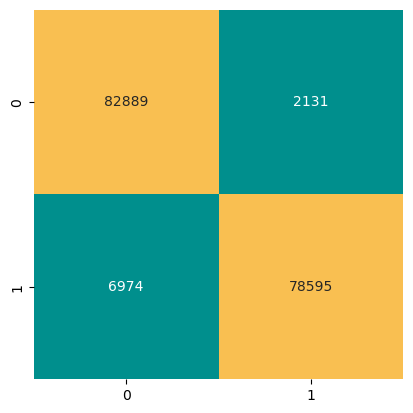

In [22]:
print("Logistic Regression Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_logreg_sm))
conf_mat = confusion_matrix(y_test,y_pred_logreg_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

### Hyperparameter tunning with GridSearchCV

### Logistic Regression

In [24]:

logreg_hyperparameters = {"penalty": ['l2', 'l1'], 
                          'C': [0.01,1,10,100],
                         "solver":['liblinear','saga']}


search=GridSearchCV(LogisticRegression(), logreg_hyperparameters, scoring='accuracy',n_jobs=-1,cv=5)
result_logreg_sm=search.fit(X_train, y_train)


In [25]:
print('Best Accuracy Score of Logistic Regression model: %s' % result_logreg_sm.best_score_)
print('Best Hyperparameters of Logistic regression Model: %s' % result_logreg_sm.best_params_)

Best Accuracy Score of Logistic Regression model: 0.9481309671961821
Best Hyperparameters of Logistic regression Model: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### Decision Tree

In [26]:
hyperparameters = {"criterion": ["gini", "entropy"],
                   "max_depth":list(range(2,4,1)), 
                   "min_samples_leaf": list(range(5,7,1))}

search = GridSearchCV(DecisionTreeClassifier(), hyperparameters,scoring='accuracy', n_jobs=-1, cv=5)
result_dtc_sm=search.fit(X_train, y_train)


In [27]:
print('Best Accuracy Score of Decision Tree model: %s' % result_dtc_sm.best_score_)
print('Best Hyperparameters of Decision Tree model: %s' % result_dtc_sm.best_params_)

Best Accuracy Score of Decision Tree model: 0.9352478727558552
Best Hyperparameters of Decision Tree model: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


### Random Forest

In [28]:
rfc_hyperparameters = {'n_estimators': [1,30,60,100],
              'max_features': ['sqrt', 'log2'], 
              'max_depth': [2,4,8,10],
              'criterion': ['gini', 'entropy','log_loss']}


search = GridSearchCV(RandomForestClassifier(), rfc_hyperparameters, scoring='accuracy', n_jobs=-1, cv=5)
result_rfc_sm=search.fit(X_train, y_train)


In [29]:
print('Best Accuracy Score of Random Forest model: %s' % result_rfc_sm.best_score_)
print('Best Hyperparameters of Random Forest model: %s' % result_rfc_sm.best_params_)

Best Accuracy Score of Random Forest model: 0.9900110812422769
Best Hyperparameters of Random Forest model: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


### Adaboost

In [30]:
ada_hyperparameters = {'n_estimators': [1,30,60,100], 
                       'learning_rate': [0.01,0.1,0.2,0.5]}


search = GridSearchCV(AdaBoostClassifier(), ada_hyperparameters, scoring='accuracy', n_jobs=-1, cv=5)
result_ada_sm=search.fit(X_train, y_train)

In [31]:
print('Best Accuracy Score of Adaboost model: %s' % result_ada_sm.best_score_)
print('Best Hyperparameters of Adaboost model: %s' % result_ada_sm.best_params_)

Best Accuracy Score of Adaboost model: 0.9652121250816057
Best Hyperparameters of Adaboost model: {'learning_rate': 0.5, 'n_estimators': 100}


### Light Gradient Boosting

In [32]:
lgb_hyperparameters = {"n_estimators":[1,30,60,100],
                      "max_depth":[2,4,6,8],
                      "learning_rate":[0.01,0.1,0.2,0.5],
                      "min_samples_leaf":[10,20,30],
                     "subsample" : [0.1,0.2,0.5,0.9]}

search = GridSearchCV(LGBMClassifier(), lgb_hyperparameters, scoring='accuracy', n_jobs=-1, cv=5)
result_lgb_sm=search.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10


In [34]:
print('Best Accuracy Score of Light Gradient Boosting model: %s' % result_lgb_sm.best_score_)
print('Best Hyperparameters of Light Gradient Boosting model: %s' % result_lgb_sm.best_params_)

Best Accuracy Score of Light Gradient Boosting model: 0.9991608896152542
Best Hyperparameters of Light Gradient Boosting model: {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 100, 'subsample': 0.1}


In [36]:
lgbc = LGBMClassifier(learning_rate= 0.2,max_depth= 6,
                     min_samples_leaf= 10,n_estimators= 100, 
                      subsample= 0.1)

result_lgbc_sm=lgbc.fit(X_train, y_train)

y_pred_lgbc_sm=result_lgbc_sm.predict(X_test)
y_pred_probs_lgbc_sm = result_lgbc_sm.predict_proba(X_test)[:,1]

In [37]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred_lgbc_sm))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85020
           1       1.00      1.00      1.00     85569

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Gradient Boosting Confusion matrix for the test set after hyperparameter tunning
[[84894   126]
 [    9 85560]]


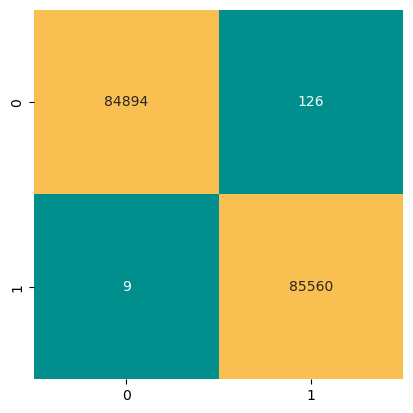

In [38]:
print("Gradient Boosting Confusion matrix for the test set after hyperparameter tunning")
print(confusion_matrix(y_test,y_pred_lgbc_sm))
conf_mat = confusion_matrix(y_test,y_pred_lgbc_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

In [53]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LGBMClassifier(learning_rate= 0.2,max_depth= 6,
                     min_samples_leaf= 10,n_estimators= 100, 
                      subsample= 0.1)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Light Gradient Boosting', model)])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=1000)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.64      0.78      0.70       152

    accuracy                           1.00     85443
   macro avg       0.82      0.89      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85226    65]
 [   34   118]]


### Conclusions

### References